# Comparison of graphical methods with measured data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

import package_DBR
from package_DBR import myRound, FOPDT, FOPDT_cost, SOPDT, SOPDT_cost, Process

import os

# Import experimental data

In [2]:
# nameFile = 'Open_loop_experiment_on_DV_2021-06-09-09h39.txt'
nameFile = 'Open_loop_experiment_on_MV_2022-05-01-13h13.txt'

if 'MV' in nameFile:
    ExpVariable = 'MV'
else:    
    ExpVariable = 'DV'
    
print(ExpVariable)    
    
titleName = nameFile.split('.')[0]    
data = pd.read_csv('Data/' + nameFile)
t = data['t'].values - data['t'].values[0]
MV = data['MV'].values
PV = data['PV'].values
DV = data['DV'].values


if ExpVariable == 'MV':
    tstep = np.argwhere(np.diff(MV) != 0)
    tstep = tstep[0][0]
    tm = t[tstep:]
    tm = tm - tm[0]    
    MVstep = MV[tstep + 1] - MV[tstep]
    MVm = MV[tstep:]
    PVm = PV[tstep:]
    PVm = (PVm - PVm[0])/MVstep
    MVm = (MVm - MVm[0])/MVstep    
else:    
    tstep = np.argwhere(np.diff(DV) != 0)
    tstep = tstep[0][0]
    tm = t[tstep:]
    tm = tm - tm[0]
    DVstep = DV[tstep + 1] - DV[tstep]    
    DVm = DV[tstep:]
    PVm = PV[tstep:]
    PVm = (PVm - PVm[0])/DVstep
    DVm = (DVm - DVm[0])/DVstep

MV


# Clean data

(0.0, 466.0)

<Figure size 1584x1584 with 0 Axes>

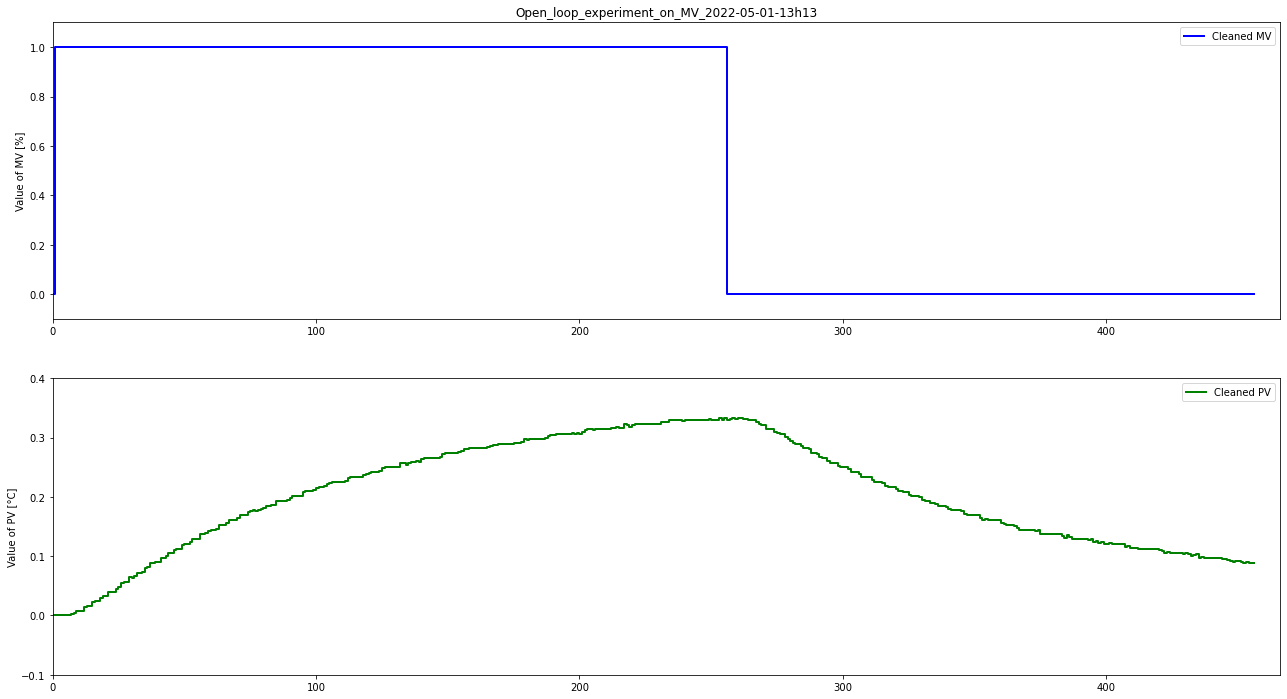

In [3]:
plt.figure(figsize = (22,22))

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(22)

if ExpVariable == 'MV':
    l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='Cleaned MV',where='post')
    ax1.set_ylabel('Value of MV [%]')
    ax1.set_title(titleName)
    ax1.legend(loc='best')
    l1.set_data(tm,MVm)
    ax1.set_ylim(myRound(np.min(MVm),1)-0.1, myRound(np.max(MVm),1)+0.1)    
else:
    l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='Cleaned DV',where='post')
    ax1.set_ylabel('Value of DV [%]')
    ax1.set_title(titleName)
    ax1.legend(loc='best')
    l1.set_data(tm,DVm)
    ax1.set_ylim(myRound(np.min(DVm),1)-0.1, myRound(np.max(DVm),1)+0.1)     

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='Cleaned PV',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')
l2.set_data(tm,PVm)
ax2.set_ylim(myRound(np.min(PVm),0.1)-0.1, myRound(np.max(PVm),0.1)+0.1)

ax1.set_xlim(0, t[-1]+1)
ax2.set_xlim(0, t[-1]+1)

# Graphical methods values

In [4]:
# Results obtained:
Kp = 0.3335
a = 0.3313
t1 = 40
t2 = 55
Tu = 10
Tg = 95

e = 2.71828

# Broida simple:
T_bs = Tg
theta_bs = Tu

# Broida complex:
T_bc = 5.5*(t2-t1)
theta_bc = 2.8*t1 - 1.8*t2

# van der Grinten:
T1_vdg = Tg*((3*a*e)/(1+a*e))
T2_vdg = Tg*((1-a*e)/(1+a*e))
theta_vdg = abs(Tu-((T1_vdg*T2_vdg)/(T1_vdg+3*T2_vdg)))

# Strejc: (second order)
a=0.1
b=2.72
T_s = Tg/b
theta_s = Tu-a*Tg

# FOPDT - Broida:
Kp_FOPDT = 0.40247556203426577
T_FOPDT = 131.1846830413941
theta_FOPDT = 3.4140379979786477
    
# SOPDT - van der Grinten
Kp_SOPDT = 0.39017974996590316
T1_SOPDT =  116.66713066757724
T2_SOPDT =  5.879909521258273e-05
theta_SOPDT = 8.040136543592041

# Step response comparison

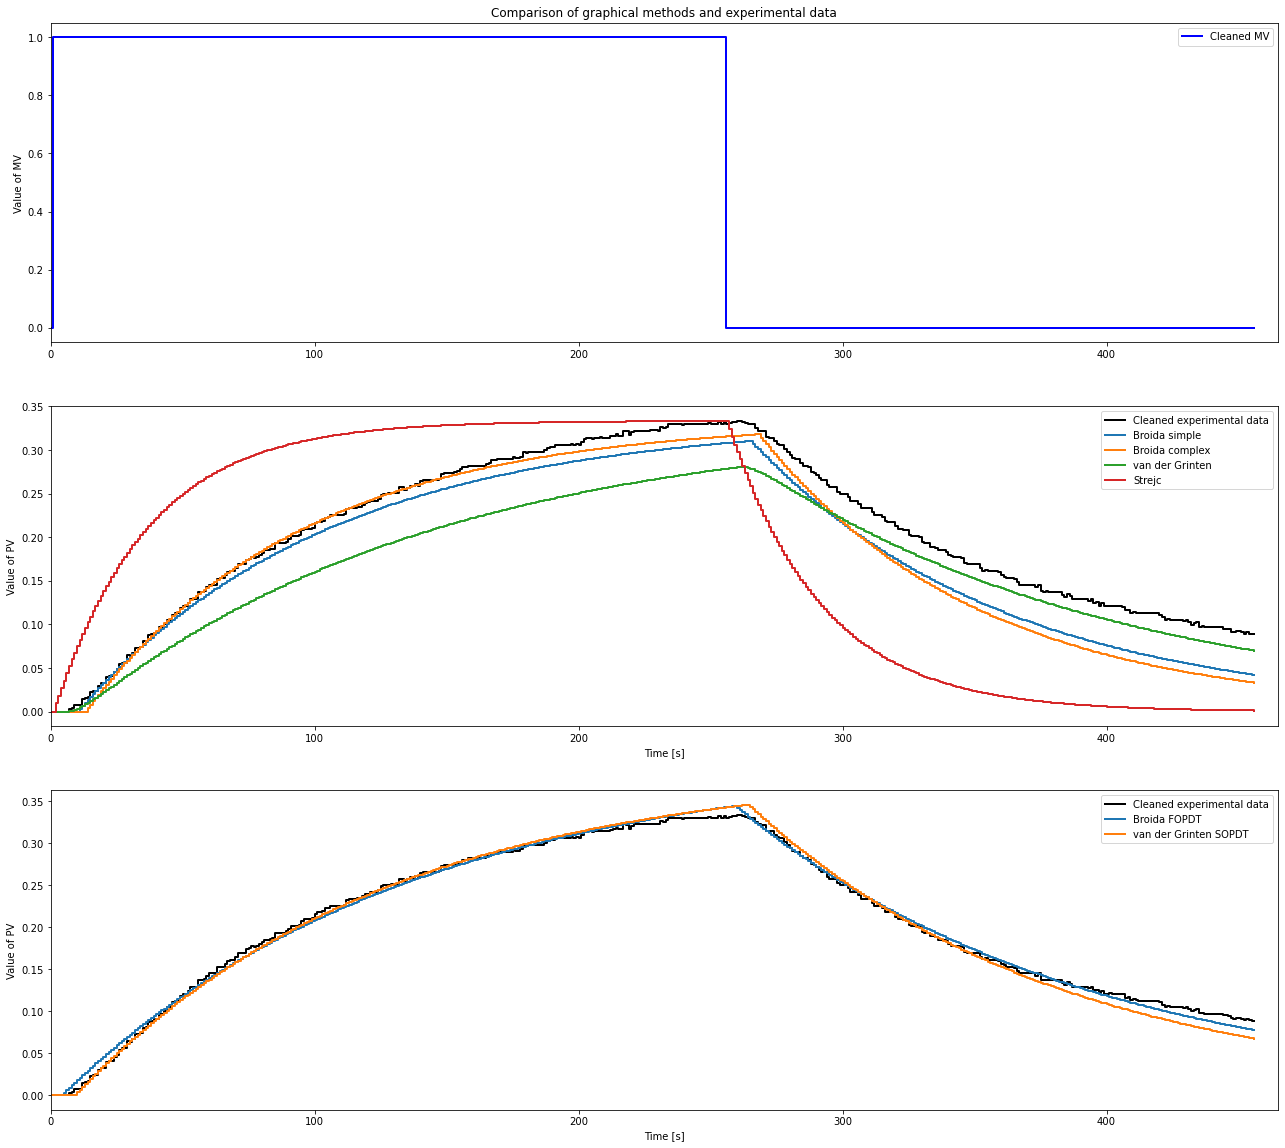

In [9]:
Ts = 1.0

broida_simple = FOPDT(MVm,Kp,T_bs,theta_bs,Ts)
broida_complex = FOPDT(MVm,Kp,T_bc,theta_bc,Ts)
VDG = SOPDT(MVm,Kp,T1_vdg,T2_vdg,theta_vdg,Ts)
strejc = SOPDT(MVm,Kp,T_s,0,theta_s,Ts)
broida_FOPDT = FOPDT(MVm,Kp_FOPDT,T_FOPDT,theta_FOPDT,Ts)
VDG_SOPDT = SOPDT(MVm,Kp_SOPDT,T1_SOPDT,T2_SOPDT,theta_SOPDT,Ts)

plt.figure(figsize = (22,20))

plt.subplot(3,1,1)
if ExpVariable == 'MV':
    plt.step(tm,MVm,'b-',linewidth=2,label='Cleaned MV',where='post')
    plt.ylabel('Value of MV')
else:
    plt.step(tm,DVm,'b-',linewidth=2,label='Cleaned DV',where='post')
    plt.ylabel('Value of DV') 
    
plt.title('Comparison of graphical methods and experimental data')
plt.legend(loc='best')
plt.xlim([0, t[-1]])

plt.subplot(3,1,2)
plt.step(tm,PVm,'k-',linewidth=2,label='Cleaned experimental data',where='post')
plt.step(tm,broida_simple,linewidth=2,label='Broida simple',where='post')
plt.step(tm,broida_complex,linewidth=2,label='Broida complex',where='post')
plt.step(tm,VDG,linewidth=2,label='van der Grinten',where='post')
plt.step(tm,strejc,linewidth=2,label='Strejc',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, t[-1]])

plt.subplot(3,1,3)
plt.step(tm,PVm,'k-',linewidth=2,label='Cleaned experimental data',where='post')
plt.step(tm,broida_FOPDT,linewidth=2,label='Broida FOPDT',where='post')
plt.step(tm,VDG_SOPDT,linewidth=2,label='van der Grinten SOPDT',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, t[-1]])


nameFile = 'Plots/Comparison_of_graphical_methods_and_experimental_data_step_response'

if not os.path.exists('Plots'):
    os.makedirs('Plots')
    
plt.savefig(nameFile + '.png',transparent=True)
plt.savefig(nameFile + '.pdf',transparent=True)

# Comparison in the frequency domain

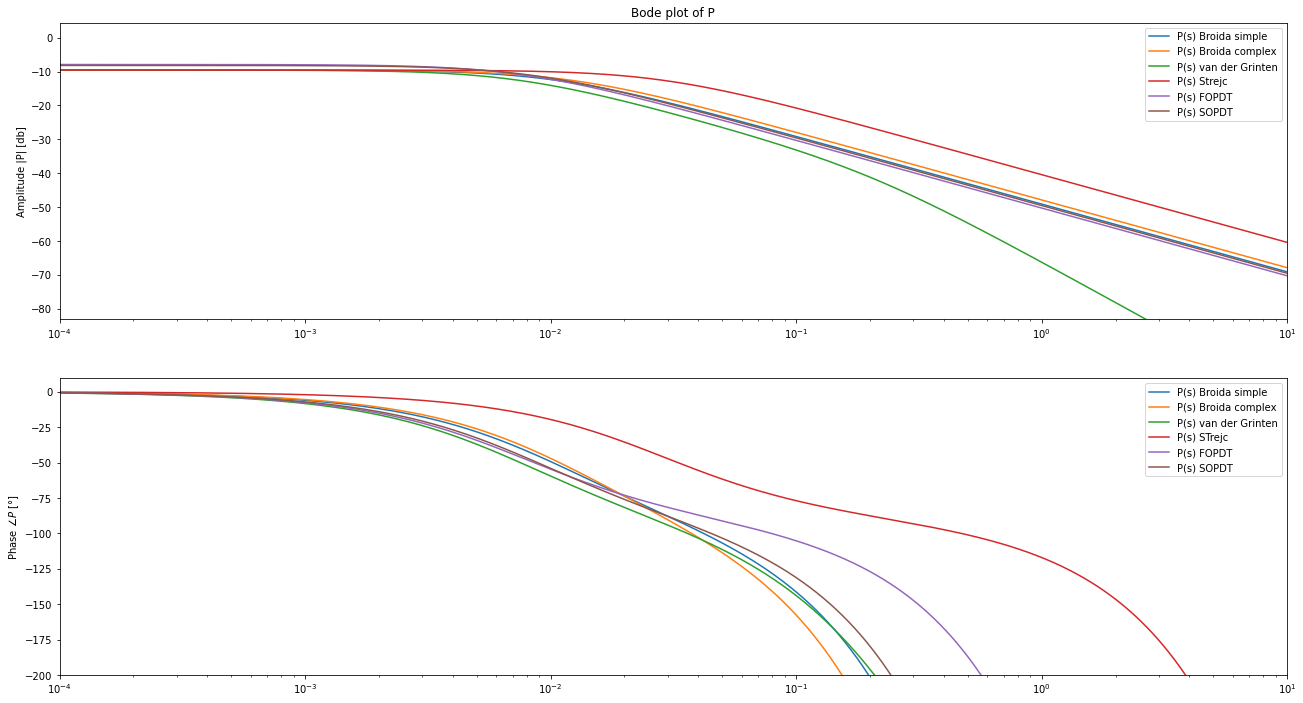

In [6]:
P_bs = Process({}) # Default process = unit gain
P_bc = Process({})
P_VDG = Process({})
P_s = Process({})
P_FOPDT = Process({})
P_SOPDT = Process({})

# Parameters for input-output dynamics P(s) - Broida simple
P_bs.parameters['Kp'] = Kp
P_bs.parameters['Tlag1'] = T_bs
P_bs.parameters['Tlag2'] = 0
P_bs.parameters['theta'] = theta_bs

# Parameters for input-output dynamics P(s) - Broida complex
P_bc.parameters['Kp'] = Kp
P_bc.parameters['Tlag1'] = T_bc
P_bc.parameters['Tlag2'] = 0
P_bc.parameters['theta'] = theta_bc

# Parameters for input-output dynamics P(s) - van der Grinten
P_VDG.parameters['Kp'] = Kp
P_VDG.parameters['Tlag1'] = T1_vdg
P_VDG.parameters['Tlag2'] = T2_vdg
P_VDG.parameters['theta'] = theta_vdg

# Parameters for input-output dynamics P(s) - Strejc
P_s.parameters['Kp'] = Kp
P_s.parameters['Tlag1'] = T_s
P_s.parameters['Tlag2'] = 0
P_s.parameters['theta'] = theta_s

# Parameters for input-output dynamics P(s) - FOPDT
P_FOPDT.parameters['Kp'] = Kp_FOPDT
P_FOPDT.parameters['Tlag1'] = T_FOPDT
P_FOPDT.parameters['Tlag2'] = 0
P_FOPDT.parameters['theta'] = theta_FOPDT

# Parameters for input-output dynamics P(s) - SOPDT
P_SOPDT.parameters['Kp'] = Kp_SOPDT
P_SOPDT.parameters['Tlag1'] = T1_SOPDT
P_SOPDT.parameters['Tlag2'] = T2_SOPDT
P_SOPDT.parameters['theta'] = theta_SOPDT

omega = np.logspace(-4, 1, 10000)

s = 1j*omega
    
Ptheta_bs = np.exp(-P_bs.parameters['theta']*s)
PGain_bs = P_bs.parameters['Kp']*np.ones_like(Ptheta_bs)
PLag1_bs = 1/(P_bs.parameters['Tlag1']*s + 1)
PLag2_bs = 1/(P_bs.parameters['Tlag2']*s + 1)
PLead1_bs = P_bs.parameters['Tlead1']*s + 1
PLead2_bs = P_bs.parameters['Tlead2']*s + 1

Ps_bs = np.multiply(Ptheta_bs,PGain_bs)
Ps_bs = np.multiply(Ps_bs,PLag1_bs)
Ps_bs = np.multiply(Ps_bs,PLag2_bs)
Ps_bs = np.multiply(Ps_bs,PLead1_bs)
Ps_bs = np.multiply(Ps_bs,PLead2_bs)

Ptheta_bc = np.exp(-P_bc.parameters['theta']*s)
PGain_bc = P_bc.parameters['Kp']*np.ones_like(Ptheta_bc)
PLag1_bc = 1/(P_bc.parameters['Tlag1']*s + 1)
PLag2_bc = 1/(P_bc.parameters['Tlag2']*s + 1)
PLead1_bc = P_bc.parameters['Tlead1']*s + 1
PLead2_bc = P_bc.parameters['Tlead2']*s + 1

Ps_bc = np.multiply(Ptheta_bc,PGain_bc)
Ps_bc = np.multiply(Ps_bc,PLag1_bc)
Ps_bc = np.multiply(Ps_bc,PLag2_bc)
Ps_bc = np.multiply(Ps_bc,PLead1_bc)
Ps_bc = np.multiply(Ps_bc,PLead2_bc)

Ptheta_VDG = np.exp(-P_VDG.parameters['theta']*s)
PGain_VDG = P_VDG.parameters['Kp']*np.ones_like(Ptheta_VDG)
PLag1_VDG = 1/(P_VDG.parameters['Tlag1']*s + 1)
PLag2_VDG = 1/(P_VDG.parameters['Tlag2']*s + 1)
PLead1_VDG = P_VDG.parameters['Tlead1']*s + 1
PLead2_VDG = P_VDG.parameters['Tlead2']*s + 1

Ps_VDG = np.multiply(Ptheta_VDG,PGain_VDG)
Ps_VDG = np.multiply(Ps_VDG,PLag1_VDG)
Ps_VDG = np.multiply(Ps_VDG,PLag2_VDG)
Ps_VDG = np.multiply(Ps_VDG,PLead1_VDG)
Ps_VDG = np.multiply(Ps_VDG,PLead2_VDG)

Ptheta_s = np.exp(-P_s.parameters['theta']*s)
PGain_s = P_s.parameters['Kp']*np.ones_like(Ptheta_s)
PLag1_s = 1/(P_s.parameters['Tlag1']*s + 1)
PLag2_s = 1/(P_s.parameters['Tlag2']*s + 1)
PLead1_s = P_s.parameters['Tlead1']*s + 1
PLead2_s = P_s.parameters['Tlead2']*s + 1

Ps_s = np.multiply(Ptheta_s,PGain_s)
Ps_s = np.multiply(Ps_s,PLag1_s)
Ps_s = np.multiply(Ps_s,PLag2_s)
Ps_s = np.multiply(Ps_s,PLead1_s)
Ps_s = np.multiply(Ps_s,PLead2_s)

Ptheta_FOPDT = np.exp(-P_FOPDT.parameters['theta']*s)
PGain_FOPDT = P_FOPDT.parameters['Kp']*np.ones_like(Ptheta_FOPDT)
PLag1_FOPDT = 1/(P_FOPDT.parameters['Tlag1']*s + 1)
PLag2_FOPDT = 1/(P_FOPDT.parameters['Tlag2']*s + 1)
PLead1_FOPDT = P_FOPDT.parameters['Tlead1']*s + 1
PLead2_FOPDT = P_FOPDT.parameters['Tlead2']*s + 1

Ps_FOPDT = np.multiply(Ptheta_FOPDT,PGain_FOPDT)
Ps_FOPDT = np.multiply(Ps_FOPDT,PLag1_FOPDT)
Ps_FOPDT = np.multiply(Ps_FOPDT,PLag2_FOPDT)
Ps_FOPDT = np.multiply(Ps_FOPDT,PLead1_FOPDT)
Ps_FOPDT = np.multiply(Ps_FOPDT,PLead2_FOPDT)

Ptheta_SOPDT = np.exp(-P_SOPDT.parameters['theta']*s)
PGain_SOPDT = P_SOPDT.parameters['Kp']*np.ones_like(Ptheta_SOPDT)
PLag1_SOPDT = 1/(P_SOPDT.parameters['Tlag1']*s + 1)
PLag2_SOPDT = 1/(P_SOPDT.parameters['Tlag2']*s + 1)
PLead1_SOPDT = P_SOPDT.parameters['Tlead1']*s + 1
PLead2_SOPDT = P_SOPDT.parameters['Tlead2']*s + 1

Ps_SOPDT = np.multiply(Ptheta_SOPDT,PGain_SOPDT)
Ps_SOPDT = np.multiply(Ps_SOPDT,PLag1_SOPDT)
Ps_SOPDT = np.multiply(Ps_SOPDT,PLag2_SOPDT)
Ps_SOPDT = np.multiply(Ps_SOPDT,PLead1_SOPDT)
Ps_SOPDT = np.multiply(Ps_SOPDT,PLead2_SOPDT)

fig, (ax_gain, ax_phase) = plt.subplots(2,1)
fig.set_figheight(12)
fig.set_figwidth(22)
# Gain part
ax_gain.semilogx(omega,20*np.log10(np.abs(Ps_bs)),label='P(s) Broida simple')
ax_gain.semilogx(omega,20*np.log10(np.abs(Ps_bc)),label='P(s) Broida complex')
ax_gain.semilogx(omega,20*np.log10(np.abs(Ps_VDG)),label='P(s) van der Grinten')
ax_gain.semilogx(omega,20*np.log10(np.abs(Ps_s)),label='P(s) Strejc')
ax_gain.semilogx(omega,20*np.log10(np.abs(Ps_FOPDT)),label='P(s) FOPDT')
ax_gain.semilogx(omega,20*np.log10(np.abs(Ps_SOPDT)),label='P(s) SOPDT')
gain_min = np.min(20*np.log10(np.abs(Ps_bs)/5))
gain_max = np.max(20*np.log10(np.abs(Ps_bs)*5))
ax_gain.set_xlim([np.min(omega), np.max(omega)])
ax_gain.set_ylim([gain_min, gain_max])
ax_gain.set_ylabel('Amplitude |P| [db]')
ax_gain.set_title('Bode plot of P')
ax_gain.legend(loc='best')
# Phase part
ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_bs)),label='P(s) Broida simple')
ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_bc)),label='P(s) Broida complex')
ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_VDG)),label='P(s) van der Grinten')
ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_s)),label='P(s) STrejc')
ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_FOPDT)),label='P(s) FOPDT')
ax_phase.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_SOPDT)),label='P(s) SOPDT')
ax_phase.set_xlim([np.min(omega), np.max(omega)])
ph_min = np.min((180/np.pi)*np.unwrap(np.angle(Ps_bs))) - 10
ph_max = np.max((180/np.pi)*np.unwrap(np.angle(Ps_bs))) + 10
ax_phase.set_ylim([np.max([ph_min, -200]), ph_max])
ax_phase.set_ylabel(r'Phase $\angle P$ [°]')
ax_phase.legend(loc='best')

nameFile = 'Plots/Comparison_of_graphical_methods_and_experimental_data_Bode'

if not os.path.exists('Plots'):
    os.makedirs('Plots')
    
plt.savefig(nameFile + '.png',transparent=True)
plt.savefig(nameFile + '.pdf',transparent=True)